In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\ABISA\Desktop\drug side effect.csv")

In [3]:
df.head()  #To display first five rows of the dataset

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Olivia Brewer,Hispanic
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Rebecca David,Native American
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Michael Carlson,African American
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Robert Jackson,Native American
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Jennifer Brown,Asian


# Description of the dataset
Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

In [4]:
df.tail()    #To display the last five rows of the dataset

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,Lauren Garcia,Caucasian
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16,Angela Sanders,Native American
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,William Duncan,Hispanic
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,Chelsea Hughes DDS,Hispanic
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3,Jeffrey Collins,Asian


In [5]:
df.shape

(362806, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  Name           362806 non-null  object
 13  Race           362806 non-null  object
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


# Preprocessing

In [7]:
# Identify missing values
df.isna().sum() 

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Name              0
Race              0
dtype: int64

In [8]:
df[['Drug','Condition','Effectiveness']].head(15)

,Drug,Condition,Effectiveness
0,25dph-7.5peh,Stuffy Nose,5
1,25dph-7.5peh,Cold Symptoms,5
2,warfarin (bulk) 100 % powder,Other,3
3,warfarin (bulk) 100 % powder,Other,2
4,warfarin (bulk) 100 % powder,Other,1
5,warfarin (bulk) 100 % powder,Other,4
6,wymzya fe,Birth Control,5
7,wymzya fe,Disease of Ovaries with Cysts,5
8,wymzya fe,Acne,2
9,"12 hour nasal relief spray, non-aerosol",Stuffy Nose,2


In [9]:
#Displays the summary statistics such as count, mean, standard deviation, minimum and maximum value, first, second and third quartile values.
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


# Insight:

In [10]:
df.describe(include='object').T

,count,unique,top,freq
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460
Name,362806,180676,Michael Smith,176
Race,362806,5,African American,72824


# Insight:

In [11]:
df.duplicated().sum()

0

In [12]:
for i in df.columns:
    print(i,':',df[i].nunique(),'\n')

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250167 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 

Name : 180676 

Race : 5 



# Insight:
'Sex' has three categories.

Four different races are present.

'Drug' has more values than 'DrugId'.

'Condition' has lesser values than 'Drug'/'DrugId'.

'Reviews' has close to 70% unique values.

In [13]:
df['Name'].value_counts()

Michael Smith         176
Michael Johnson       132
James Smith           129
Michael Williams      123
Jennifer Smith        110
                     ... 
Natalie Patel           1
Cynthia Barker DVM      1
Jordan Powers           1
Renee Durham            1
Chelsea Hughes DDS      1
Name: Name, Length: 180676, dtype: int64

In [14]:
df['Race'].value_counts()

African American    72824
Native American     72666
Hispanic            72599
Caucasian           72473
Asian               72244
Name: Race, dtype: int64

In [15]:
df['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [16]:
df['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [17]:
df['Effectiveness'].value_counts()

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64

In [18]:
df['Reviews'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           41824
good                                                                                                                                                                                                                                                                                                                                                   

In [19]:
df['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [20]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [21]:
df['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [22]:
df['Condition'].value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

In [23]:
df['Drug'].value_counts().head(30)

cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                                 

In [24]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Name', 'Race'],
      dtype='object')

In [25]:
# How many Drugs per condition (Top 20)
df.groupby('Condition')['Drug'].nunique().nlargest(20)

Condition
Other                                         4469
Osteoporosis                                   229
Birth Control                                  204
Pain                                           202
High Blood Pressure                            200
Acne                                           197
Painful Periods                                161
Rheumatoid Arthritis                           148
Cough                                          137
Cold Symptoms                                  129
Inflammation of the Nose due to an Allergy     122
Type 2 Diabetes Mellitus                       117
Abnormally Long or Heavy Periods               111
Incomplete or Infrequent Bowel Movements       109
Stuffy Nose                                    108
Disease of Ovaries with Cysts                  103
Allergic Conjunctivitis                        102
Migraine Headache                               95
"Change of Life" Signs                          92
Atopic Dermatitis    

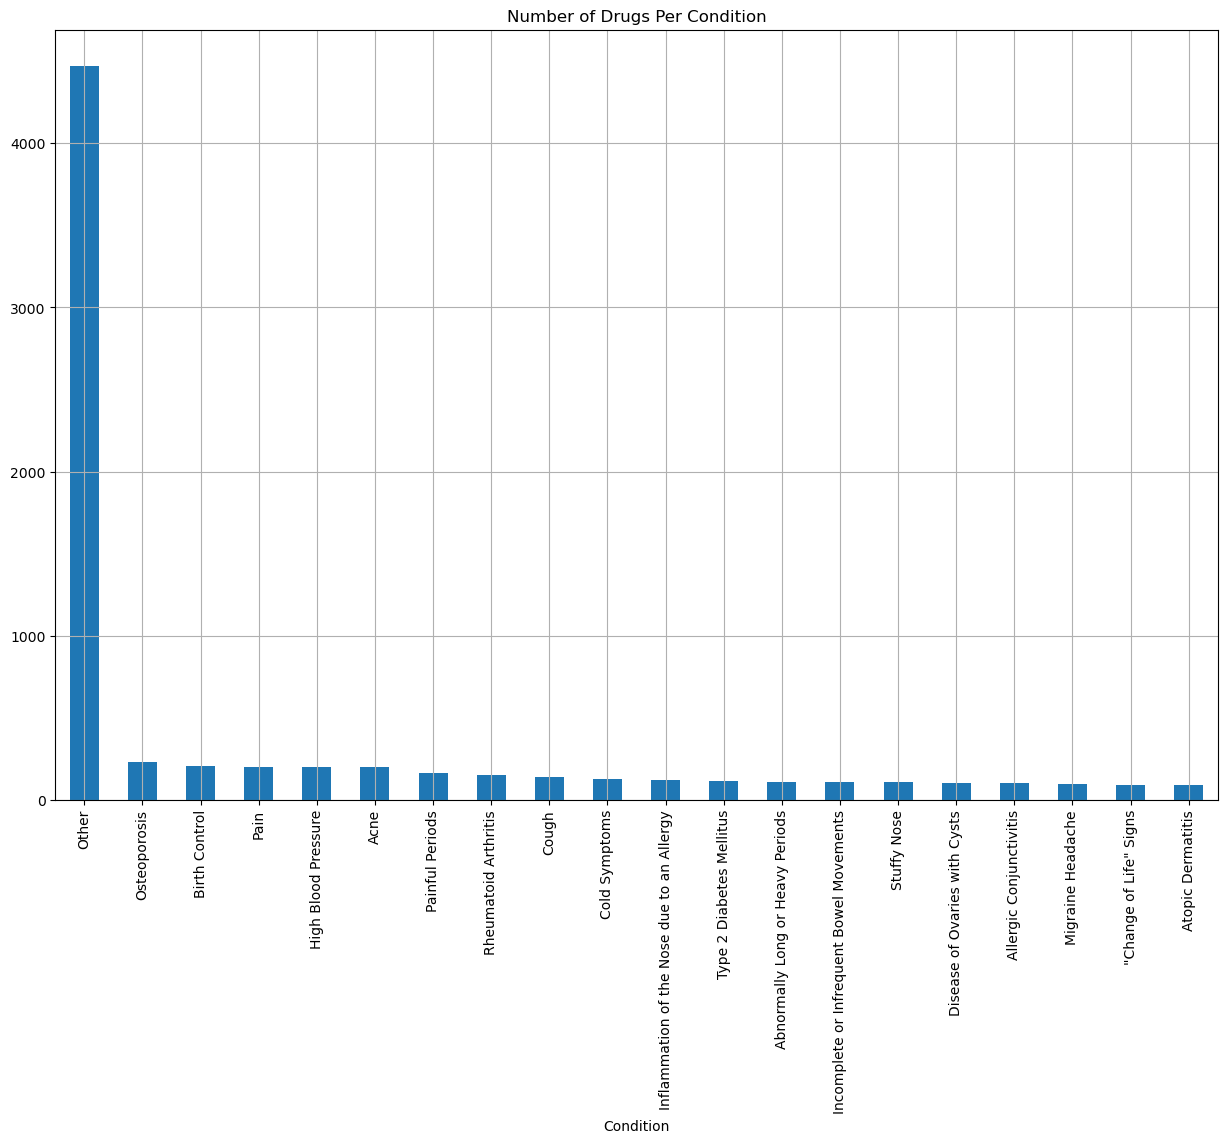

In [26]:
# How many Drugs per condition (Top 20)
plt.figure(figsize=(15,10))
df.groupby('Condition')['Drug'].nunique().nlargest(20).plot(kind='bar')
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()


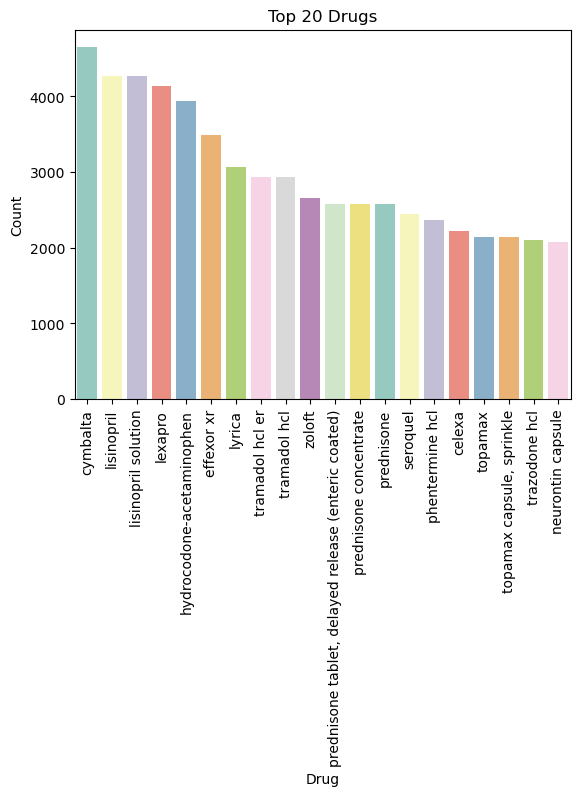

In [27]:
#the list of drugs available (top 20)
top_drugs = df['Drug'].value_counts().head(20)
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='Set3')
plt.title("Top 20 Drugs")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=90,fontsize=10)  # Rotates the x-axis labels for better readability
plt.show()

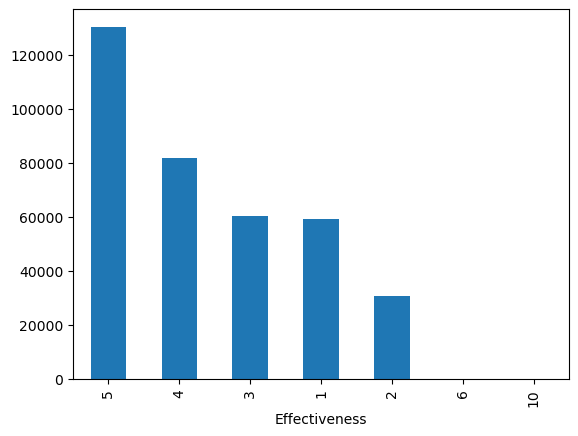

In [28]:
#the effectiveness of the drugs
df['Effectiveness'].value_counts().plot(kind='bar')
plt.xlabel('Effectiveness')
plt.show()

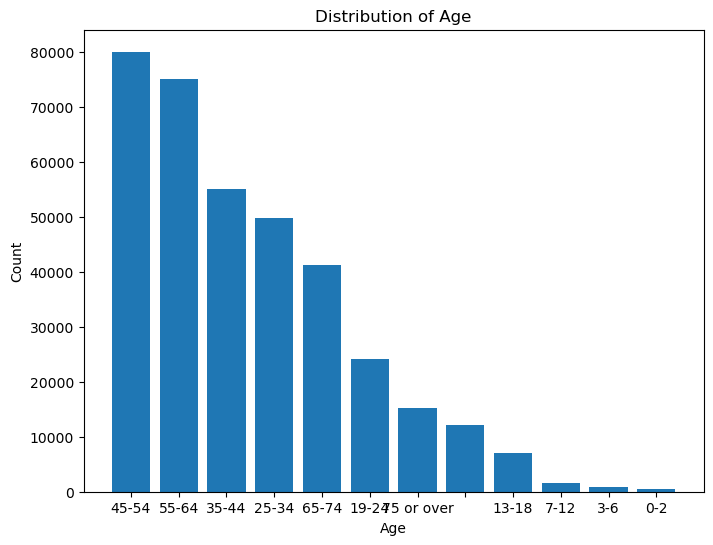

In [29]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts().values)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

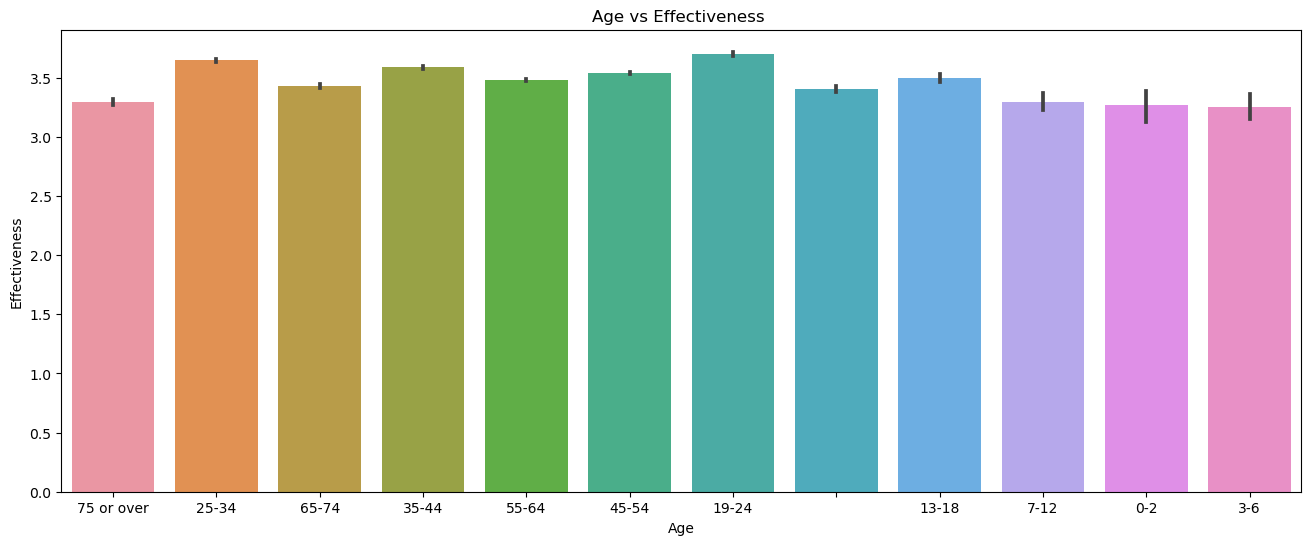

In [30]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Age', y='Effectiveness', data=df, ax=ax)
ax.set_title('Age vs Effectiveness ')
ax.set_xlabel('Age')
ax.set_ylabel('Effectiveness')
plt.show()

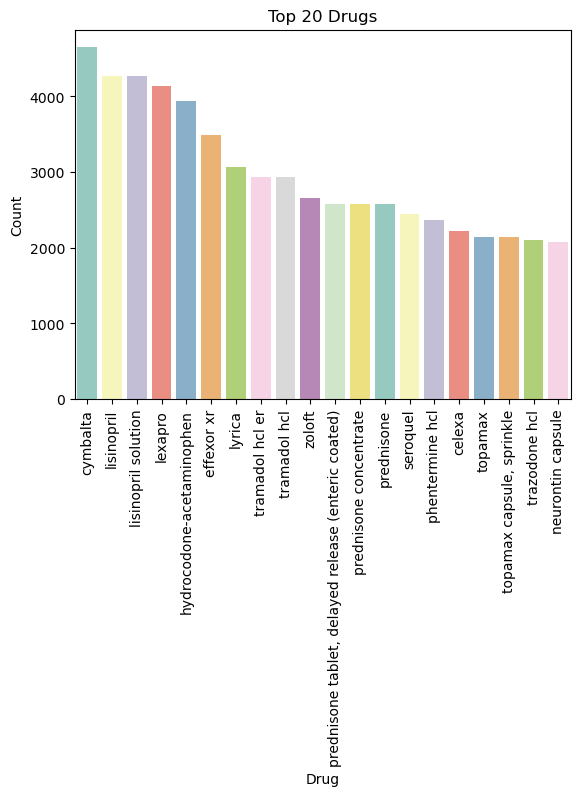

In [31]:
top_drugs = df['Drug'].value_counts().head(20)
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='Set3')
plt.title("Top 20 Drugs")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=90,fontsize=10)  # Rotates the x-axis labels for better readability
plt.show()

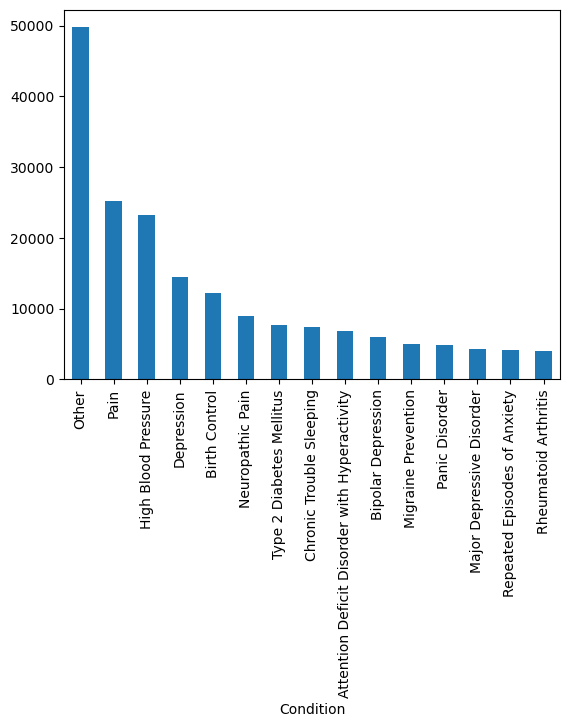

In [32]:
#various condition the medicine cures (top 10)
df['Condition'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Condition')
plt.show()

In [33]:
#Distribution of rating
df['UsefulCount']

0          0
1          1
2          0
3          0
4          1
          ..
362801     2
362802    16
362803     3
362804     1
362805     3
Name: UsefulCount, Length: 362806, dtype: int64

In [34]:
# Average Rating of satisfraction
avg_Satisfaction = (df['Satisfaction'].groupby(df['Drug']).mean())

In [35]:
avg_Satisfaction

Drug
12 hour decongestant                       4.000000
12 hour nasal relief spray, non-aerosol    2.000000
15dm-100gfn-5peh                           1.000000
20dm-4cpm                                  1.000000
25dph-7.5peh                               5.000000
                                             ...   
zytiga                                     4.137931
zyvox                                      3.555556
zyvox solution, intravenous                3.500000
zyvox suspension, reconstituted            3.555556
zzzquil                                    2.884354
Name: Satisfaction, Length: 7093, dtype: float64

In [36]:
# Average Rating of Effectiveness
avg_Effectiveness = (df['Effectiveness'].groupby(df['Drug']).mean())

In [37]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Name', 'Race'],
      dtype='object')

In [38]:
avg_Effectiveness

Drug
12 hour decongestant                       4.000000
12 hour nasal relief spray, non-aerosol    2.000000
15dm-100gfn-5peh                           5.000000
20dm-4cpm                                  1.000000
25dph-7.5peh                               5.000000
                                             ...   
zytiga                                     4.206897
zyvox                                      4.133333
zyvox solution, intravenous                3.937500
zyvox suspension, reconstituted            4.133333
zzzquil                                    3.251701
Name: Effectiveness, Length: 7093, dtype: float64

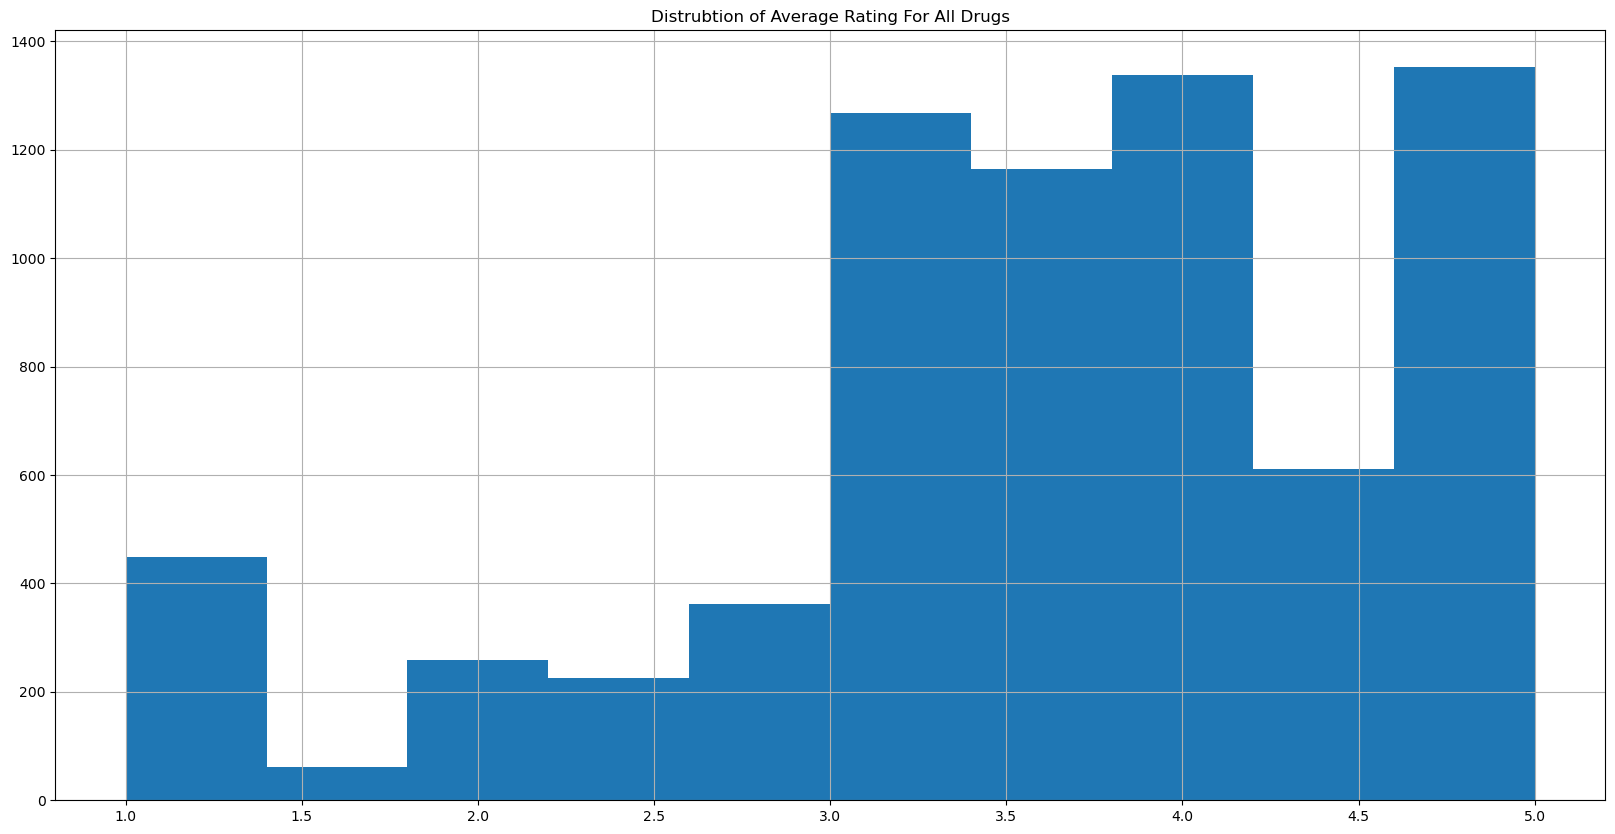

In [39]:
# Average Effectiveness For All Drugs
plt.figure(figsize=(20,10))
avg_Effectiveness.hist()
plt.title("Distrubtion of Average Rating For All Drugs")
plt.show()

In [40]:
# How genuine is the review? (Using sentiment analysis)
from textblob import TextBlob

In [41]:
pip install textblob


In [42]:
def get_sentiment(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.polarity
    else:
        return 0.0  # or any other default value for non-string values

def get_sentiment_label(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        if blob.polarity > 0:
            result = 'positive'
        elif blob.polarity < 0:
            result = 'negative'
        else:
            result = 'neutral'
        return result
    else:
        return 'neutral'  # or any other default label for non-string values


In [43]:
# Sentiment Score for Review
df['sentiment'] = df['Reviews'].apply(get_sentiment)


In [44]:
df['sentiment_label'] = df['Reviews'].apply(get_sentiment_label)

In [45]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Olivia Brewer,Hispanic,0.337500,positive
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Rebecca David,Native American,0.285714,positive
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Michael Carlson,African American,0.150000,positive
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Robert Jackson,Native American,0.000000,neutral
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Jennifer Brown,Asian,0.046429,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,Lauren Garcia,Caucasian,0.212500,positive
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16,Angela Sanders,Native American,0.004167,positive
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,William Duncan,Hispanic,-0.443750,negative
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,Chelsea Hughes DDS,Hispanic,-0.359524,negative


In [46]:
data_copy = df.copy()

In [47]:
# Handling instances with whitespaces
for i in data_copy:
    data_copy[i]=np.where(data_copy[i]==" ",np.NAN,data_copy[i])

In [48]:
data_copy.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0,Olivia Brewer,Hispanic,0.337500,positive
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0,Rebecca David,Native American,0.285714,positive
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,why did my PTINR go from a normal of 2.5 to ov...,3.0,Female,NaN,0.0,Michael Carlson,African American,0.150000,positive
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,FALLING AND DON'T REALISE IT,1.0,Female,NaN,0.0,Robert Jackson,Native American,0.000000,neutral
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,My grandfather was prescribed this medication ...,1.0,Male,NaN,1.0,Jennifer Brown,Asian,0.046429,positive


In [49]:
#checking missing values
data_copy.isnull().sum()

Age                12202
Condition             43
Date                   0
Drug                   0
DrugId                 0
EaseofUse              0
Effectiveness          0
Reviews            41861
Satisfaction           0
Sex                26537
Sides              17460
UsefulCount            0
Name                   0
Race                   0
sentiment              0
sentiment_label        0
dtype: int64

In [50]:
drug_cymbalta= df.loc[(df['Drug'] =='cymbalta')]
drug_cymbalta.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label
314212,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,,"Nausea , dry mouth , constipation , loss of ...",12,Misty Burgess,African American,-0.075000,negative
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0,Ian Maldonado,Caucasian,-0.233333,negative
314223,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,,"Nausea , dry mouth , constipation , loss of ...",0,Gregory Hansen,Asian,0.224242,positive
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0,Randall Mathews,African American,0.122000,positive
314246,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,,"Nausea , dry mouth , constipation , loss of ...",1,Christopher Holland,African American,-0.580000,negative


In [51]:
drug_cymbalta['Condition'].value_counts()

Major Depressive Disorder                                    1939
Neuropathic Pain                                              699
Repeated Episodes of Anxiety                                  577
Other                                                         514
Disorder characterized by Stiff, Tender & Painful Muscles     409
Chronic Muscle or Bone Pain                                   405
Anxiousness associated with Depression                         55
Diabetic Complication causing Injury to some Body Nerves       50
Name: Condition, dtype: int64

In [52]:
data_new = drug_cymbalta.copy()

In [53]:
data_copy = df.copy()

In [54]:
# Handling instances with whitespaces
for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [55]:
#checking missing values
data_new.isnull().sum()

Age                118
Condition            0
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews            502
Satisfaction         0
Sex                197
Sides                0
UsefulCount          0
Name                 0
Race                 0
sentiment            0
sentiment_label      0
dtype: int64

In [56]:
data_new.shape

(4648, 16)

In [57]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

In [58]:
data_new.isnull().sum()

Age                0
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews            0
Satisfaction       0
Sex                0
Sides              0
UsefulCount        0
Name               0
Race               0
sentiment          0
sentiment_label    0
dtype: int64

In [59]:
data_new.shape

(3949, 16)


# Text processing

In [60]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Sides']) != str:
        data_new.iloc[i]['Sides'] = str(data_new.iloc[i]['Sides'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Reviews']) != str:
        data_new.iloc[i]['Reviews'] = str(data_new.iloc[i]['Reviews'])
        
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Condition']) != str:
        data_new.iloc[i]['Condition'] = str(data_new.iloc[i]['Condition'])

In [61]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

In [62]:
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

314216    nausea mouth constipation loss appetite tiredn...
314235    nausea mouth constipation loss appetite tiredn...
314267    nausea mouth constipation loss appetite tiredn...
314305    nausea mouth constipation loss appetite tiredn...
314323    nausea mouth constipation loss appetite tiredn...
                                ...                        
319080    nausea mouth constipation loss appetite tiredn...
319081    nausea mouth constipation loss appetite tiredn...
319082    nausea mouth constipation loss appetite tiredn...
319084    nausea mouth constipation loss appetite tiredn...
319085    nausea mouth constipation loss appetite tiredn...
Name: Sides, Length: 3949, dtype: object

In [63]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [64]:
import nltk
nltk.data.path


['C:\\Users\\ABISA/nltk_data',
 'C:\\Users\\ABISA\\anaconda3\\nltk_data',
 'C:\\Users\\ABISA\\anaconda3\\share\\nltk_data',
 'C:\\Users\\ABISA\\anaconda3\\lib\\nltk_data',
 'C:\\Users\\ABISA\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data']

In [65]:
data_new['Sides']

314216    nausea mouth constipation loss appetite tiredn...
314235    nausea mouth constipation loss appetite tiredn...
314267    nausea mouth constipation loss appetite tiredn...
314305    nausea mouth constipation loss appetite tiredn...
314323    nausea mouth constipation loss appetite tiredn...
                                ...                        
319080    nausea mouth constipation loss appetite tiredn...
319081    nausea mouth constipation loss appetite tiredn...
319082    nausea mouth constipation loss appetite tiredn...
319084    nausea mouth constipation loss appetite tiredn...
319085    nausea mouth constipation loss appetite tiredn...
Name: Sides, Length: 3949, dtype: object

In [66]:
data_new['Sex'].value_counts()

Female    3246
Male       703
Name: Sex, dtype: int64

In [67]:
data_new['Age'].value_counts()

45-54         1126
55-64          854
35-44          784
25-34          537
65-74          331
19-24          208
75 or over      79
13-18           28
0-2              1
7-12             1
Name: Age, dtype: int64

In [68]:
data_new['Age'].unique()

array(['45-54', '35-44', '55-64', '75 or over', '65-74', '19-24', '25-34',
       '13-18', '0-2', '7-12'], dtype=object)

In [69]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [70]:
data_new['Age'].value_counts()

45-54     1126
55-64      854
35-44      784
25-34      537
65-74      331
19-24      208
75-100      79
13-18       28
0-2          1
7-12         1
Name: Age, dtype: int64

# Outliers detection

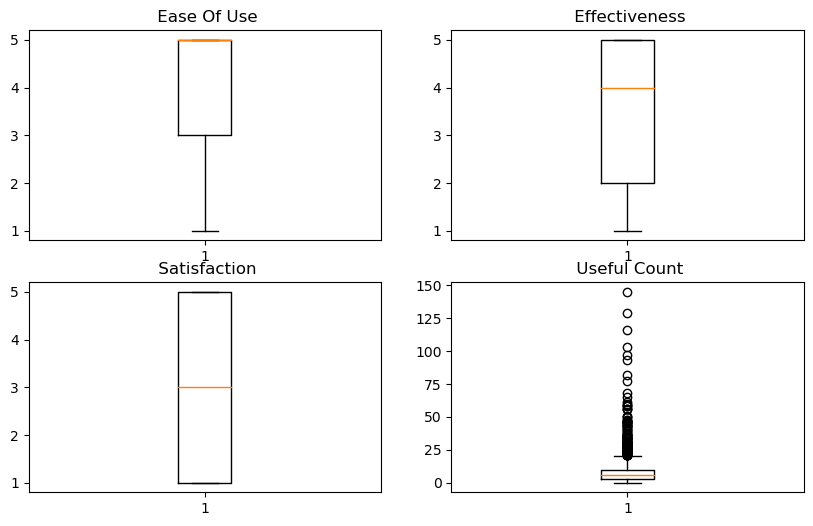

In [71]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

# Removing outliers

In [72]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [73]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount']:
    index_list.extend(outliers(data_new,feature))
index_list

[314329,
 314416,
 314465,
 314477,
 314496,
 314523,
 314528,
 314545,
 314555,
 314557,
 314571,
 314573,
 314578,
 314581,
 314596,
 314665,
 314783,
 314785,
 314988,
 315026,
 315047,
 315050,
 315056,
 315079,
 315080,
 315112,
 315133,
 315135,
 315137,
 315139,
 315142,
 315176,
 315180,
 315189,
 315190,
 315195,
 315196,
 315210,
 315213,
 315215,
 315223,
 315225,
 315236,
 315241,
 315242,
 315247,
 315260,
 315284,
 315294,
 315362,
 315401,
 315436,
 315444,
 315466,
 315519,
 315521,
 315538,
 315631,
 315635,
 315678,
 315680,
 315684,
 315692,
 315704,
 315710,
 315719,
 315720,
 315729,
 315736,
 315752,
 315761,
 315794,
 315801,
 315804,
 315833,
 315849,
 315856,
 315864,
 315872,
 315896,
 315936,
 315944,
 315947,
 315994,
 316008,
 316011,
 316087,
 316136,
 316139,
 316147,
 316152,
 316184,
 316271,
 316352,
 316381,
 316404,
 316421,
 316422,
 316439,
 316453,
 316463,
 316472,
 316497,
 316499,
 316502,
 316503,
 316507,
 316512,
 316517,
 316547,
 316551,
 

In [74]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [75]:
data_new.shape

(3949, 16)

In [76]:
data_new=remove(data_new,index_list)

In [77]:
data_new.shape

(3739, 16)

# UsefulCount column post outliers removal

Text(0.5, 1.0, 'Box plot of Useful Count')

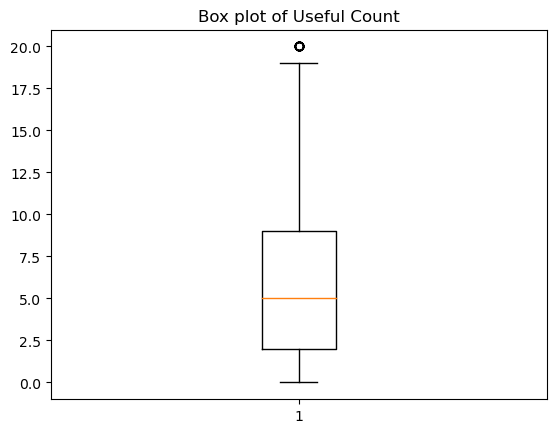

In [78]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')


In [79]:
data_new[data_new['Satisfaction'] > 5]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label


# Feature engineering

In [80]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [81]:
data_new['SideEffects']=data1

# Since DrugId is the same, dropping the column

In [82]:
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

In [83]:
data_new.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,Name,Race,sentiment,sentiment_label,SideEffects
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,3.0,1.0,I was prescribed Cymbalta for anxiety and star...,Male,nausea mouth constipation loss appetite tiredn...,0.0,Ian Maldonado,Caucasian,-0.233333,negative,Nil
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,3.0,3.0,Bipolar I with a neck fusion. Pdoc prescribed ...,Female,nausea mouth constipation loss appetite tiredn...,0.0,Randall Mathews,African American,0.122000,positive,Mild
314267,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,5.0,4.0,I have only had one 30mg and so far i noticed ...,Female,nausea mouth constipation loss appetite tiredn...,0.0,Tamara Harris,Native American,0.064167,positive,Severe
314305,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,5.0,4.0,The biggest problem was impotency from this pi...,Male,nausea mouth constipation loss appetite tiredn...,0.0,Theresa Castro,Caucasian,0.000000,neutral,Severe
314323,75-100,Chronic Muscle or Bone Pain,8/13/2019,cymbalta,5.0,5.0,I had extreme fatigue and muscle pain. Felt li...,Female,nausea mouth constipation loss appetite tiredn...,1.0,Jessica Reynolds,Caucasian,0.187500,positive,Extreme


In [84]:
data_copy = data_new.copy()

# Feature reduction

# Correlation analysis

Correlation matrix is plotted to check the relationship between variables

<AxesSubplot:>

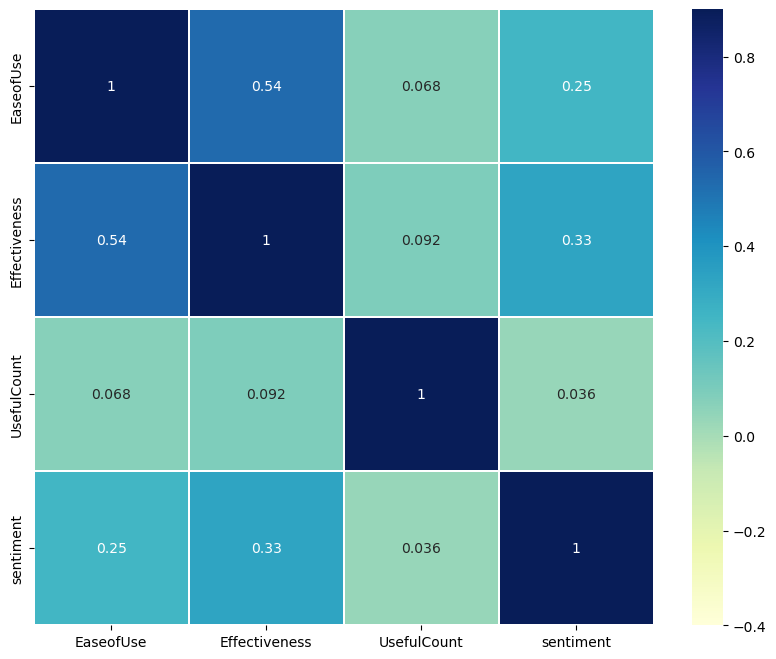

In [85]:
corrmatrix = data_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

# Here, being common, dropped the Drug, Sides columns. The other columns such as Date, Name, Reviews and UsefulCount are also dropped since these doesn't deal with side effects of the drug.

In [86]:
data_new=data_new.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount','sentiment'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,Race,sentiment_label,SideEffects
0,45-54,Repeated Episodes of Anxiety,3.0,1.0,Male,Caucasian,negative,Nil
1,35-44,Anxiousness associated with Depression,3.0,3.0,Female,African American,positive,Mild
2,45-54,Chronic Muscle or Bone Pain,5.0,4.0,Female,Native American,positive,Severe
3,55-64,Chronic Muscle or Bone Pain,5.0,4.0,Male,Caucasian,neutral,Severe
4,75-100,Chronic Muscle or Bone Pain,5.0,5.0,Female,Caucasian,positive,Extreme


In [87]:
data_new.shape

(3739, 8)

# Encoding

In [88]:
#Finding categorical columns and chnaging datatype
for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              3739 non-null   category
 1   Condition        3739 non-null   category
 2   EaseofUse        3739 non-null   float64 
 3   Effectiveness    3739 non-null   float64 
 4   Sex              3739 non-null   category
 5   Race             3739 non-null   category
 6   sentiment_label  3739 non-null   category
 7   SideEffects      3739 non-null   category
dtypes: category(6), float64(2)
memory usage: 81.8 KB


In [89]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [90]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              3739 non-null   category
 1   Condition        3739 non-null   category
 2   EaseofUse        3739 non-null   float64 
 3   Effectiveness    3739 non-null   float64 
 4   Sex              3739 non-null   category
 5   Race             3739 non-null   category
 6   sentiment_label  3739 non-null   category
 7   SideEffects      3739 non-null   category
dtypes: category(6), float64(2)
memory usage: 81.8 KB


In [91]:
data_new.columns

Index(['Age', 'Condition', 'EaseofUse', 'Effectiveness', 'Sex', 'Race',
       'sentiment_label', 'SideEffects'],
      dtype='object')

In [92]:
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,Race,sentiment_label,SideEffects
0,45-54,Repeated Episodes of Anxiety,3.0,1.0,Male,Caucasian,negative,Nil
1,35-44,Anxiousness associated with Depression,3.0,3.0,Female,African American,positive,Mild
2,45-54,Chronic Muscle or Bone Pain,5.0,4.0,Female,Native American,positive,Severe
3,55-64,Chronic Muscle or Bone Pain,5.0,4.0,Male,Caucasian,neutral,Severe
4,75-100,Chronic Muscle or Bone Pain,5.0,5.0,Female,Caucasian,positive,Extreme


In [93]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects','sentiment_label']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [94]:
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,Race,sentiment_label,SideEffects
0,5,7,3.0,1.0,1,2,0,3
1,4,0,3.0,3.0,0,0,2,1
2,5,1,5.0,4.0,0,4,2,4
3,6,1,5.0,4.0,1,2,1,4
4,9,1,5.0,5.0,0,2,2,0


In [95]:
data_new.shape

(3739, 8)

# Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse','sentiment_label']
data_new[scale] = ss.fit_transform(data_new[scale])

In [97]:
data_new.shape

(3739, 8)

In [98]:
#data_new.to_csv('drug_topamax_modelling.csv', index=False)
data_model = data_new.copy()

# Exploratory Data Analysis

# 1. Top 20 Drugs

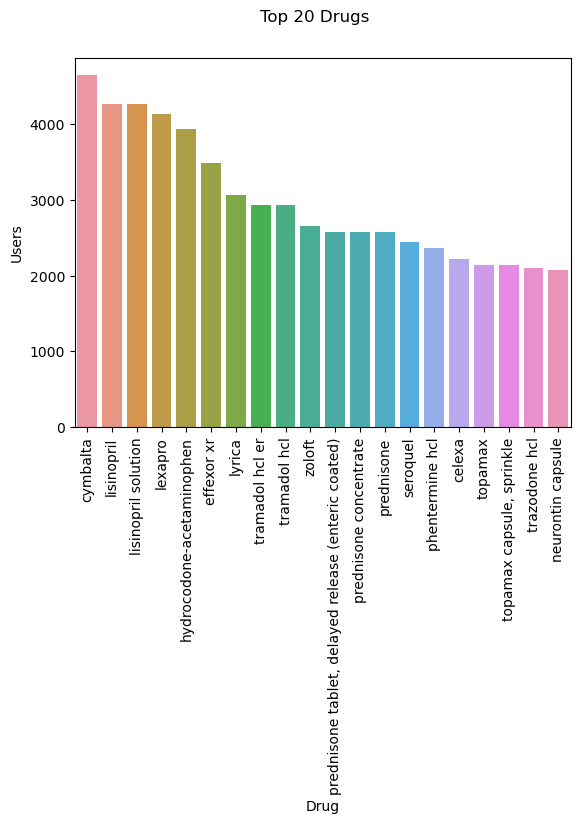

In [99]:
data1= df['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

# 2. Top 20 Conditions

Text(0, 0.5, 'Users')

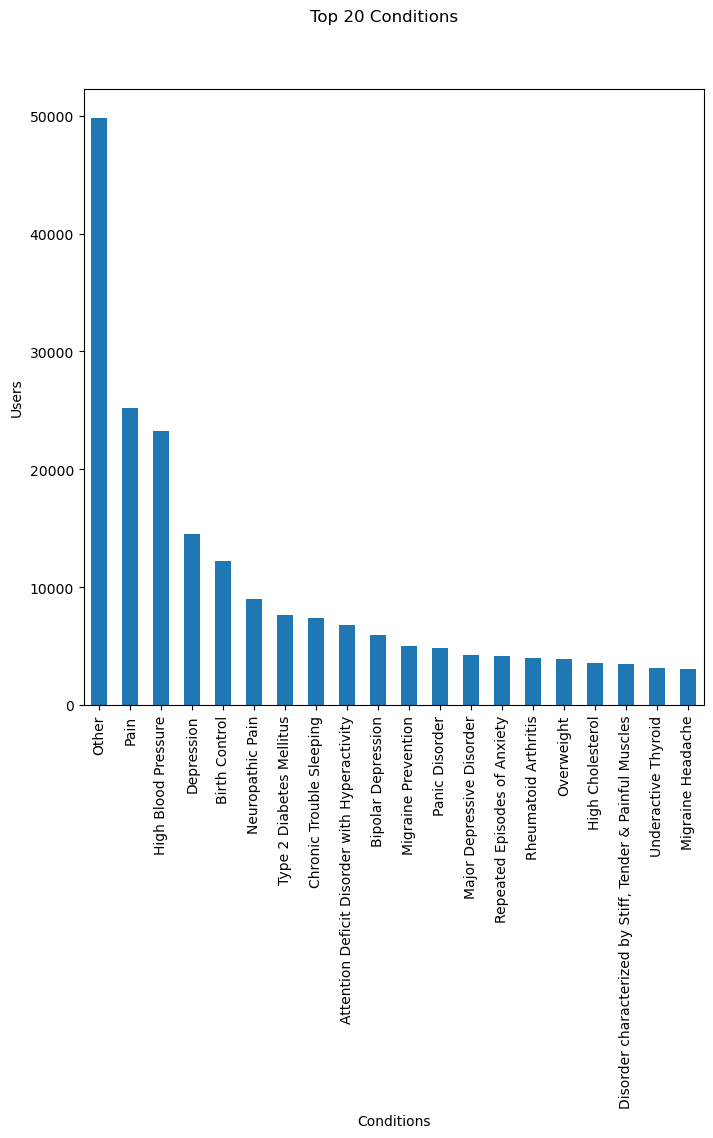

In [100]:
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

# 3. Conditions - cymbalta

Text(0, 0.5, 'Count')

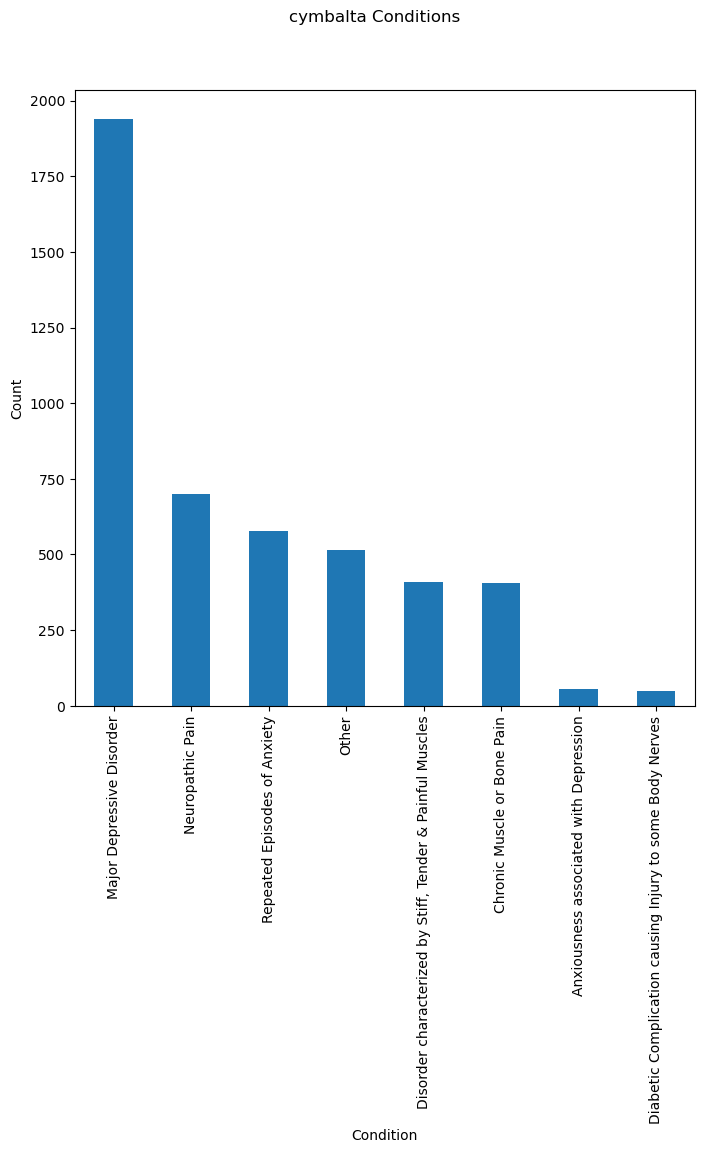

In [101]:
drug_cymbalta['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("cymbalta Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

# Users by Gender - cymbalta

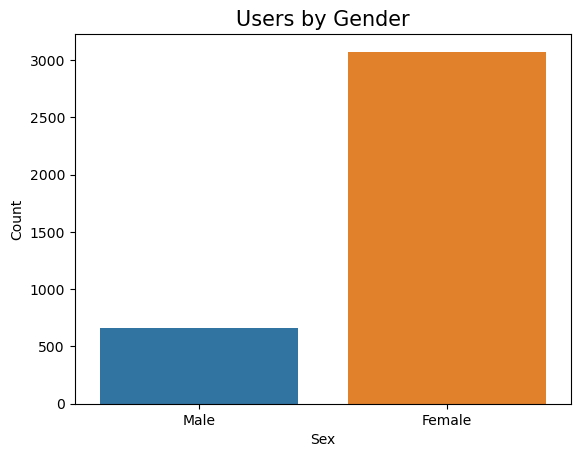

In [102]:
# plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

# 5. Users by Race - cymbalta

Text(0, 0.5, 'Count')

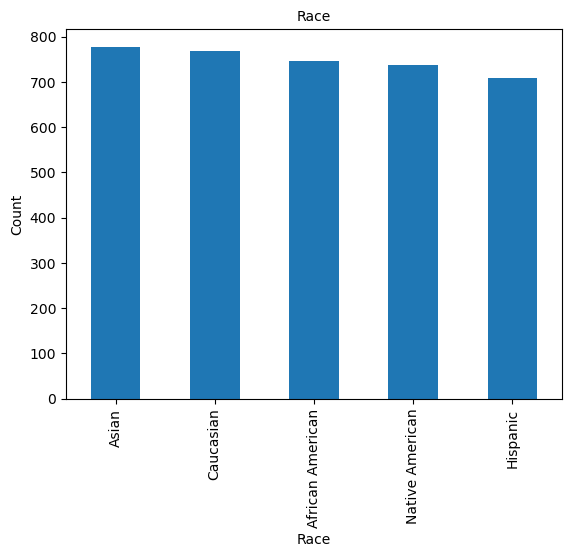

In [103]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

## 6. Users by Race and Gender

Text(0.5, 1.0, 'Users by Race and Gender')

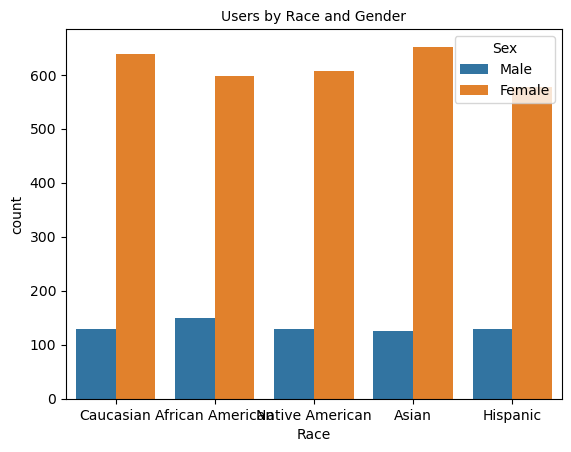

In [104]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 10)

## 7. Users by Age and Gender

Text(0.5, 1.0, 'Users by Age and Gender')

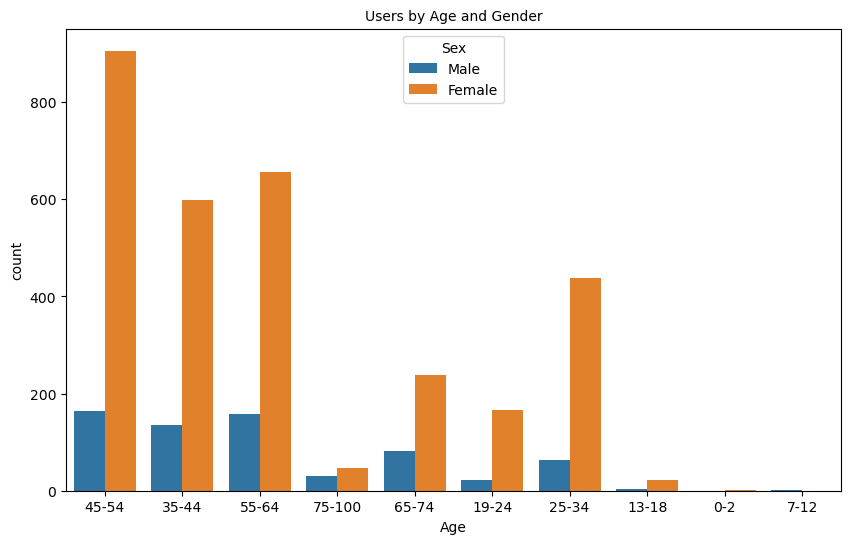

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 10)

## 8. Correlation Heatmap

<AxesSubplot:>

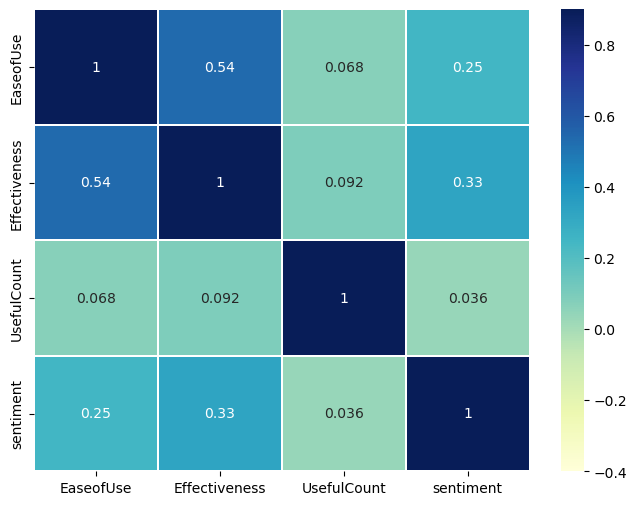

In [106]:
# heatmap of the data for checking the correlation
corrmatrix = data_copy.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

# 9. Yearly Reviews - cymbalta

In [108]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')

In [109]:
#extracting year from Date
data_copy['Year'] = data_copy['Date'].dt.year

C:\Users\ABISA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


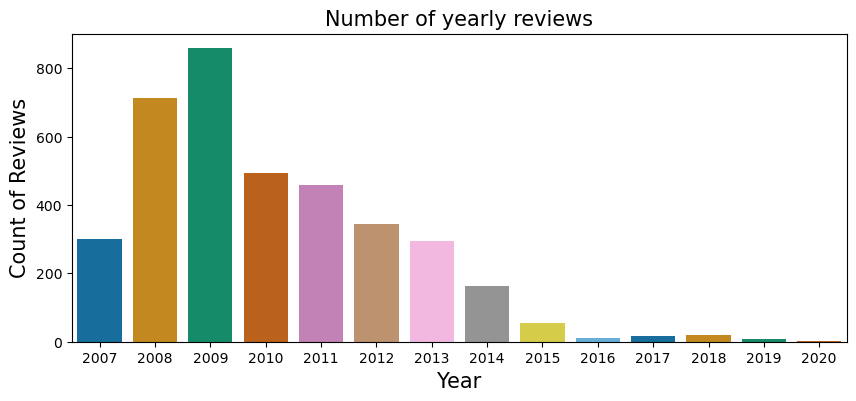

In [110]:
plt.figure(figsize=(10,4))
sns.countplot(data_copy['Year'], palette ='colorblind')
plt.title('Number of yearly reviews', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

## 10. Effectiveness

Text(0, 0.5, 'Count')

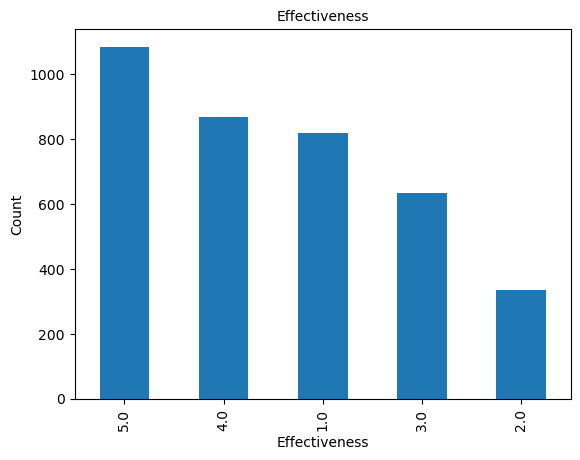

In [111]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

## 11. Ease of Use

Text(0, 0.5, 'Count')

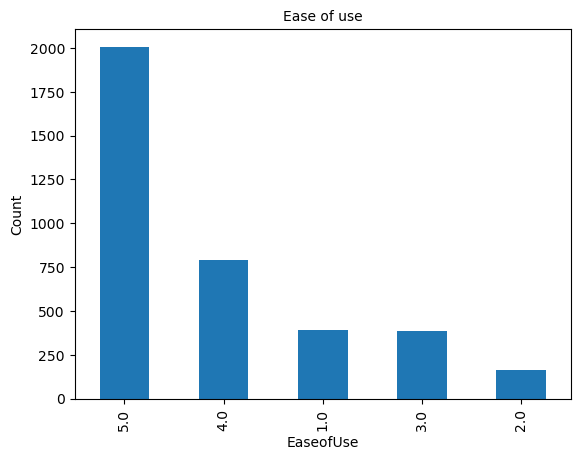

In [112]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

## 12. Useful Count

Text(0, 0.5, 'Count')

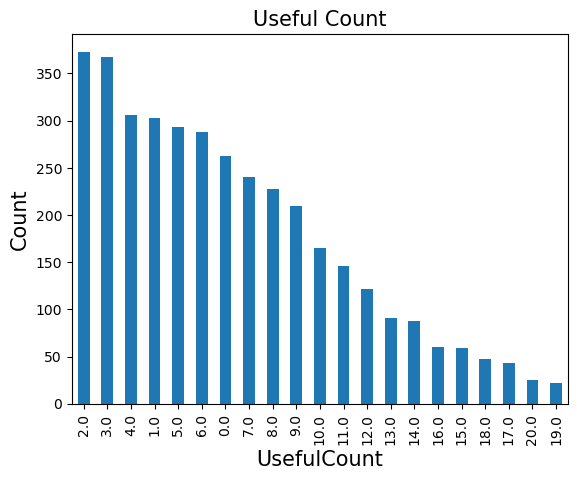

In [113]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Useful Count", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

## 13. Users by Effectiveness and Gender

<Figure size 1000x800 with 0 Axes>

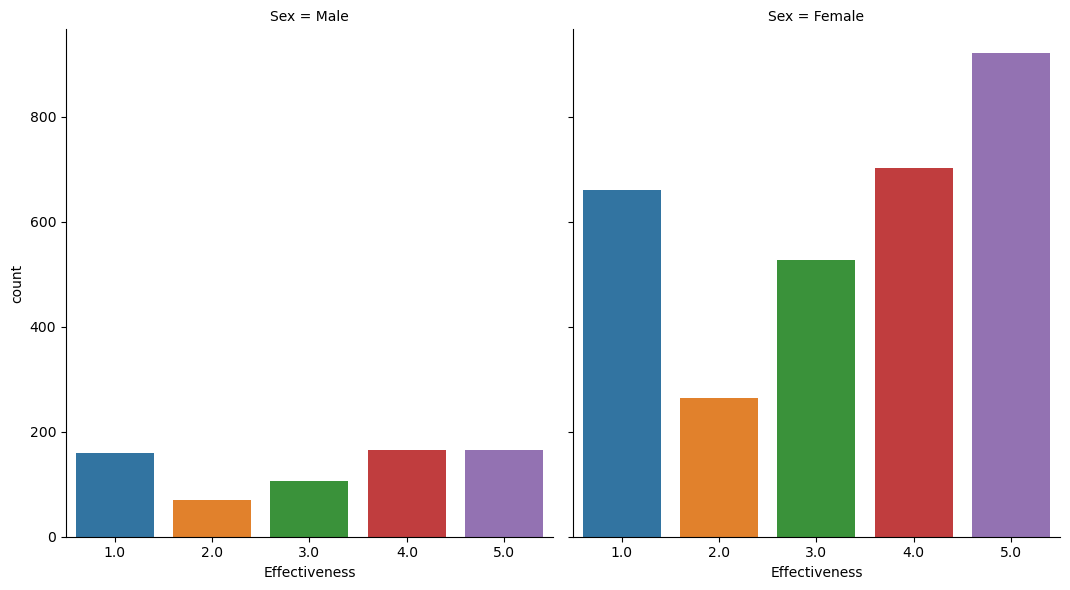

In [114]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9);


## 14. Side Effects

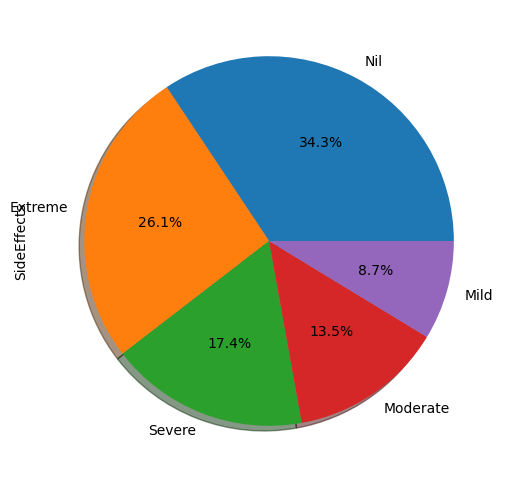

In [115]:
plt.figure(figsize=(6,6))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

## 15. Side Effects and Age

<AxesSubplot:xlabel='Age', ylabel='count'>

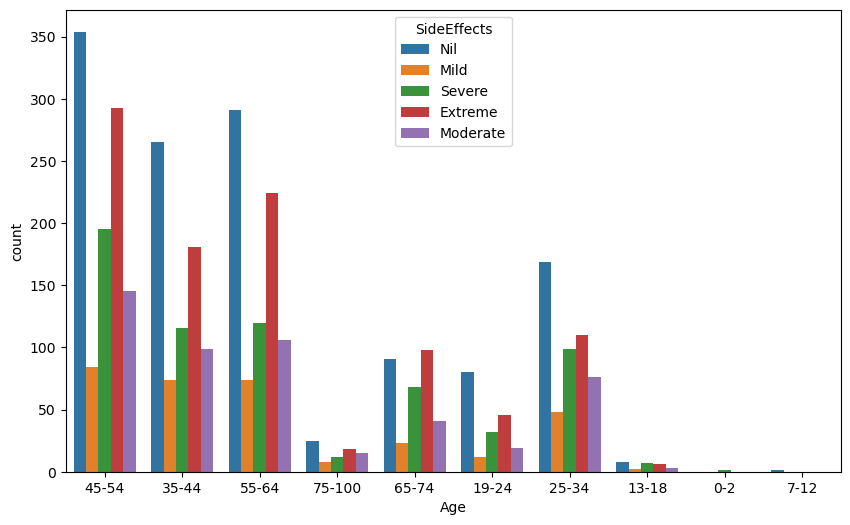

In [116]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

## 16. Side Effects and Gender

<Figure size 2000x1000 with 0 Axes>

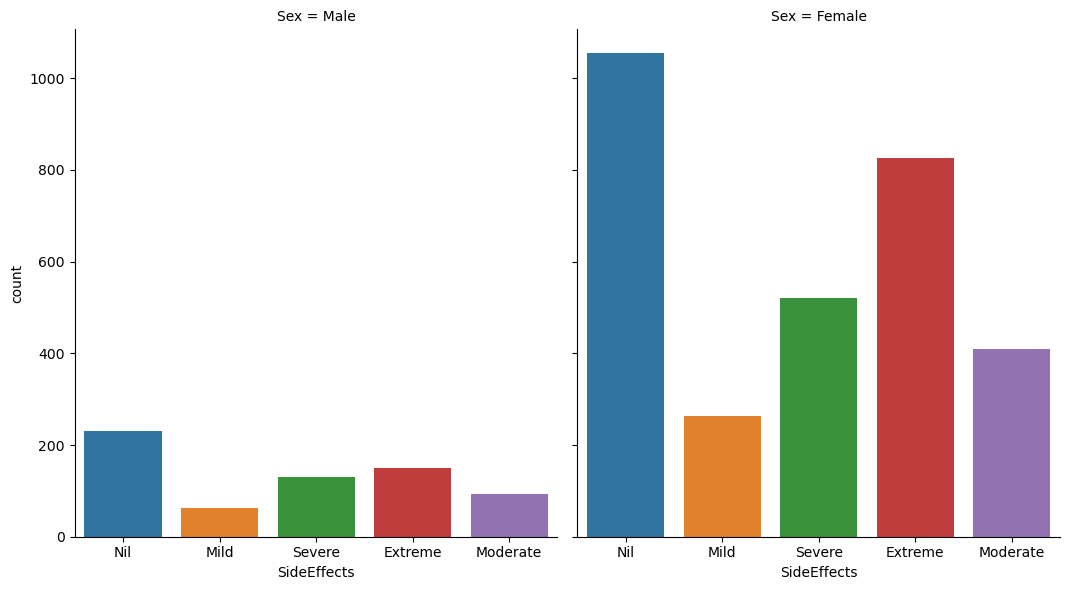

In [117]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="SideEffects",col="Sex",data=data_copy, kind="count",height=6,aspect =.9);

## 17. Side Effects and Race

<AxesSubplot:xlabel='Race', ylabel='count'>

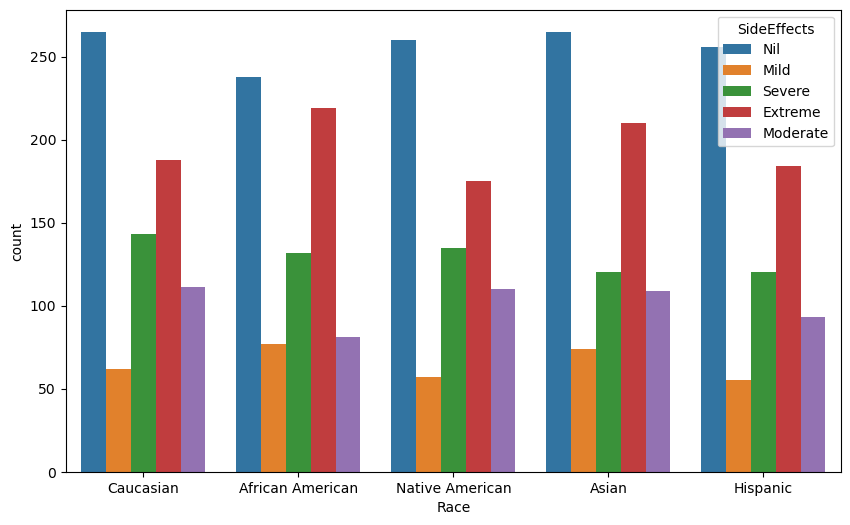

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

# Splitting the data

In [119]:
#target
y = data_new['SideEffects']

In [120]:
X = data_new.drop(['SideEffects'],axis=1)

In [121]:
X.shape

(3739, 7)

# Splitting the dataset into train and test sets

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [123]:
X_train.shape

(2991, 7)

In [124]:
X_test.shape

(748, 7)

In [125]:
y_train.shape

(2991,)

In [126]:
y_test.shape

(748,)

# Modelling

## 1. Logistic Regression Model

In [127]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(max_iter=1000,solver='liblinear')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

### Performance Evaluation

In [129]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))

Accuracy is :  65.10695187165776
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       210
           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00        93
           3       0.67      0.93      0.78       264
           4       0.49      0.36      0.42       118

    accuracy                           0.65       748
   macro avg       0.37      0.45      0.40       748
weighted avg       0.50      0.65      0.56       748



C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix of Logistic Regression Model

In [130]:
confusion_matrix(y_test,y_pred)

array([[198,   0,   0,   2,  10],
       [  8,   0,   0,  51,   4],
       [ 14,   0,   0,  56,  23],
       [ 10,   0,   0, 246,   8],
       [ 63,   0,   0,  12,  43]], dtype=int64)

# 2. KNN Model

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
from sklearn.metrics import accuracy_score
import warnings
# Suppress the warning
warnings.filterwarnings("ignore", category=FutureWarning)
acc_values = []
neighbors = np.arange(3, 15)

# Creating a loop to create KNN model for each K value
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)  # Create an instance of KNN with k neighbors
    classifier.fit(X_train, y_train)  # Train the model
    y_pred = classifier.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Compute accuracy score
    acc_values.append(acc)  # Append accuracy score to the list


In [133]:
acc_values

[0.5949197860962567,
 0.5949197860962567,
 0.589572192513369,
 0.6082887700534759,
 0.6283422459893048,
 0.6216577540106952,
 0.6323529411764706,
 0.6270053475935828,
 0.6390374331550802,
 0.6377005347593583,
 0.6350267379679144,
 0.6470588235294118]

## To find which k value got the highest accuracy, plotted a graph between neighbor values (i.e. k values) and accuracy values

Text(0, 0.5, 'accuracy')

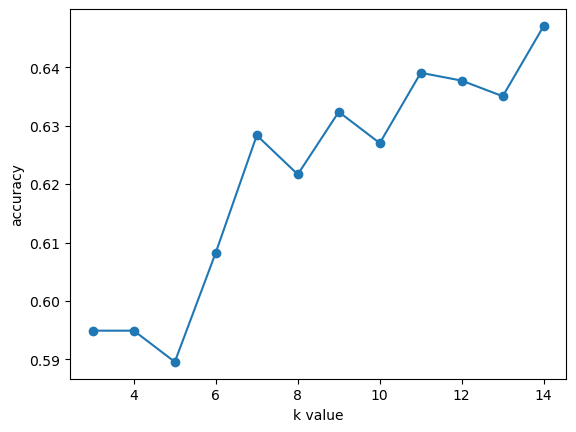

In [134]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [135]:
classifier = KNeighborsClassifier(n_neighbors= 14, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [136]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))

Accuracy is :  64.70588235294117
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       210
           1       0.24      0.06      0.10        63
           2       0.39      0.26      0.31        93
           3       0.80      0.85      0.82       264
           4       0.42      0.31      0.36       118

    accuracy                           0.65       748
   macro avg       0.50      0.48      0.47       748
weighted avg       0.60      0.65      0.61       748



## Confusion Matrix for KNN Classifier

In [137]:
confusion_matrix(y_test,y_pred)

array([[194,   0,   2,   2,  12],
       [  9,   4,  12,  32,   6],
       [ 23,   6,  24,  15,  25],
       [ 13,   5,  13, 225,   8],
       [ 60,   2,  11,   8,  37]], dtype=int64)

# 3. Decision Tree Classifier

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

## Performance Evaluation

In [139]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))

Accuracy is :  61.096256684491976
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       210
           1       0.20      0.24      0.22        63
           2       0.29      0.32      0.31        93
           3       0.83      0.76      0.79       264
           4       0.39      0.33      0.36       118

    accuracy                           0.61       748
   macro avg       0.49      0.49      0.49       748
weighted avg       0.62      0.61      0.61       748



## Confusion Matrix of Decision Tree Model

In [140]:
confusion_matrix(y_test,y_pred)

array([[172,   5,   7,   2,  24],
       [  5,  15,  13,  22,   8],
       [  7,  18,  30,  15,  23],
       [  7,  28,  22, 201,   6],
       [ 36,  10,  30,   3,  39]], dtype=int64)

# 4. Support Vector Machine

## a. Linear SVM

In [141]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

## Performance Evaluation

In [142]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))

Accuracy is :  69.38502673796792
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       210
           1       0.00      0.00      0.00        63
           2       0.43      0.31      0.36        93
           3       0.75      0.88      0.81       264
           4       0.53      0.70      0.60       118

    accuracy                           0.69       748
   macro avg       0.50      0.55      0.52       748
weighted avg       0.63      0.69      0.66       748



C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix of Linear SVM Model

In [143]:
confusion_matrix(y_test,y_pred)

array([[176,   0,   4,   0,  30],
       [  5,   0,   7,  40,  11],
       [  5,   0,  29,  30,  29],
       [ 10,   0,  18, 231,   5],
       [ 21,   0,   9,   5,  83]], dtype=int64)


# b. Polynomial SVM

In [144]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)


## Performance Evaluation

In [145]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))

Accuracy is :  69.11764705882352
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       210
           1       0.50      0.02      0.03        63
           2       0.43      0.31      0.36        93
           3       0.76      0.88      0.82       264
           4       0.52      0.67      0.58       118

    accuracy                           0.69       748
   macro avg       0.60      0.54      0.52       748
weighted avg       0.67      0.69      0.66       748



### Confusion Matrix of Polynomial SVM

In [146]:
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       210
           1       0.50      0.02      0.03        63
           2       0.43      0.31      0.36        93
           3       0.76      0.88      0.82       264
           4       0.52      0.67      0.58       118

    accuracy                           0.69       748
   macro avg       0.60      0.54      0.52       748
weighted avg       0.67      0.69      0.66       748



# c. Radial SVM

In [147]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

## Performance Evaluation

In [148]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))

Accuracy is :  69.5187165775401
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       210
           1       0.00      0.00      0.00        63
           2       0.41      0.31      0.36        93
           3       0.78      0.88      0.83       264
           4       0.51      0.69      0.59       118

    accuracy                           0.70       748
   macro avg       0.50      0.54      0.52       748
weighted avg       0.63      0.70      0.66       748



C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [149]:
confusion_matrix(y_test,y_pred)

array([[177,   0,   2,   1,  30],
       [  5,   0,  12,  35,  11],
       [  5,   0,  29,  27,  32],
       [ 10,   0,  17, 233,   4],
       [ 23,   0,  10,   4,  81]], dtype=int64)

# 5. Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

In [151]:

print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  64.03743315508021


In [152]:
confusion_matrix(y_test,y_pred)

array([[167,   4,   6,   4,  29],
       [  6,   8,  15,  26,   8],
       [  6,  14,  34,  12,  27],
       [  9,  13,  20, 216,   6],
       [ 27,   4,  28,   5,  54]], dtype=int64)

# Feature Importance

In [153]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

Effectiveness      38.776183
Age                14.599958
EaseofUse          13.332248
Condition          13.228051
Race               11.351151
sentiment_label     5.910683
Sex                 2.801727
dtype: float64

## Fine tuning of hyper parameters

In [154]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [155]:
# creating another instance of random forest classifier with some changes in hyperparameter
rft= RandomForestClassifier(bootstrap=True, n_estimators=1000,max_depth=8,random_state =42,criterion='entropy')

In [156]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=42)

In [157]:
y_pred=rft.predict(X_test)

In [158]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)


Accuracy is :  69.25133689839572


# 6. Gradient Boosting

In [159]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [160]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  69.11764705882352


In [161]:
confusion_matrix(y_test,y_pred)

array([[177,   1,   2,   0,  30],
       [  6,   3,  14,  30,  10],
       [  4,   3,  39,  16,  31],
       [ 10,   9,  21, 221,   3],
       [ 23,   4,  10,   4,  77]], dtype=int64)

# 7. Extreme Gradient Boosting

In [162]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [163]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

In [164]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  65.10695187165776


In [165]:
confusion_matrix(y_test,y_pred)

array([[174,   3,   3,   3,  27],
       [  6,   5,  14,  29,   9],
       [  7,  13,  35,  11,  27],
       [ 10,  17,  21, 213,   3],
       [ 27,   3,  21,   7,  60]], dtype=int64)